In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
data_files_path = {
    'XAUUSD': '../data/XAUUSD_D1_201101030000_202212300000.csv',
}

C_DATE = 'date'
C_TIME = 'time'
C_OPEN = 'open'
C_HIGH = 'high'
C_LOW = 'low'
C_CLOSE = 'close'
C_VOLUME = 'volume'
C_TICK_VOLUME = 'tick_volume'
C_SPREAD = 'spread'

columns = {
    '<DATE>': C_DATE,
    '<TIME>': C_TIME,
    '<OPEN>': C_OPEN,
    '<HIGH>': C_HIGH,
    '<LOW>': C_LOW,
    '<CLOSE>': C_CLOSE,
    '<TICKVOL>': C_TICK_VOLUME,
    '<VOL>': C_VOLUME,
    '<SPREAD>': C_SPREAD,
}

In [3]:
def read_dataframe(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path, sep='\t')
    
    return (
        df
        .rename(columns=columns)
        .drop(columns=[C_VOLUME])
        .astype({C_DATE: 'datetime64[ns]'})
        .set_index(C_DATE)
    )

In [4]:
df_xauusd = read_dataframe(data_files_path['XAUUSD'])

In [5]:
df_xauusd

,open,high,low,close,tick_volume,spread
date,,,,,,
2011-01-03,1418.65,1423.80,1412.80,1413.85,17713,50
2011-01-04,1415.20,1417.10,1374.65,1381.15,26224,0
2011-01-05,1381.60,1384.70,1363.85,1378.45,26788,50
2011-01-06,1377.35,1379.75,1364.55,1370.90,25530,50
2011-01-07,1371.30,1378.75,1352.70,1369.00,28870,0
...,...,...,...,...,...,...
2022-12-23,1792.28,1803.10,1791.01,1797.25,86969,42
2022-12-27,1800.06,1833.11,1799.52,1813.36,93055,33
2022-12-28,1813.20,1814.42,1796.84,1804.10,89562,38


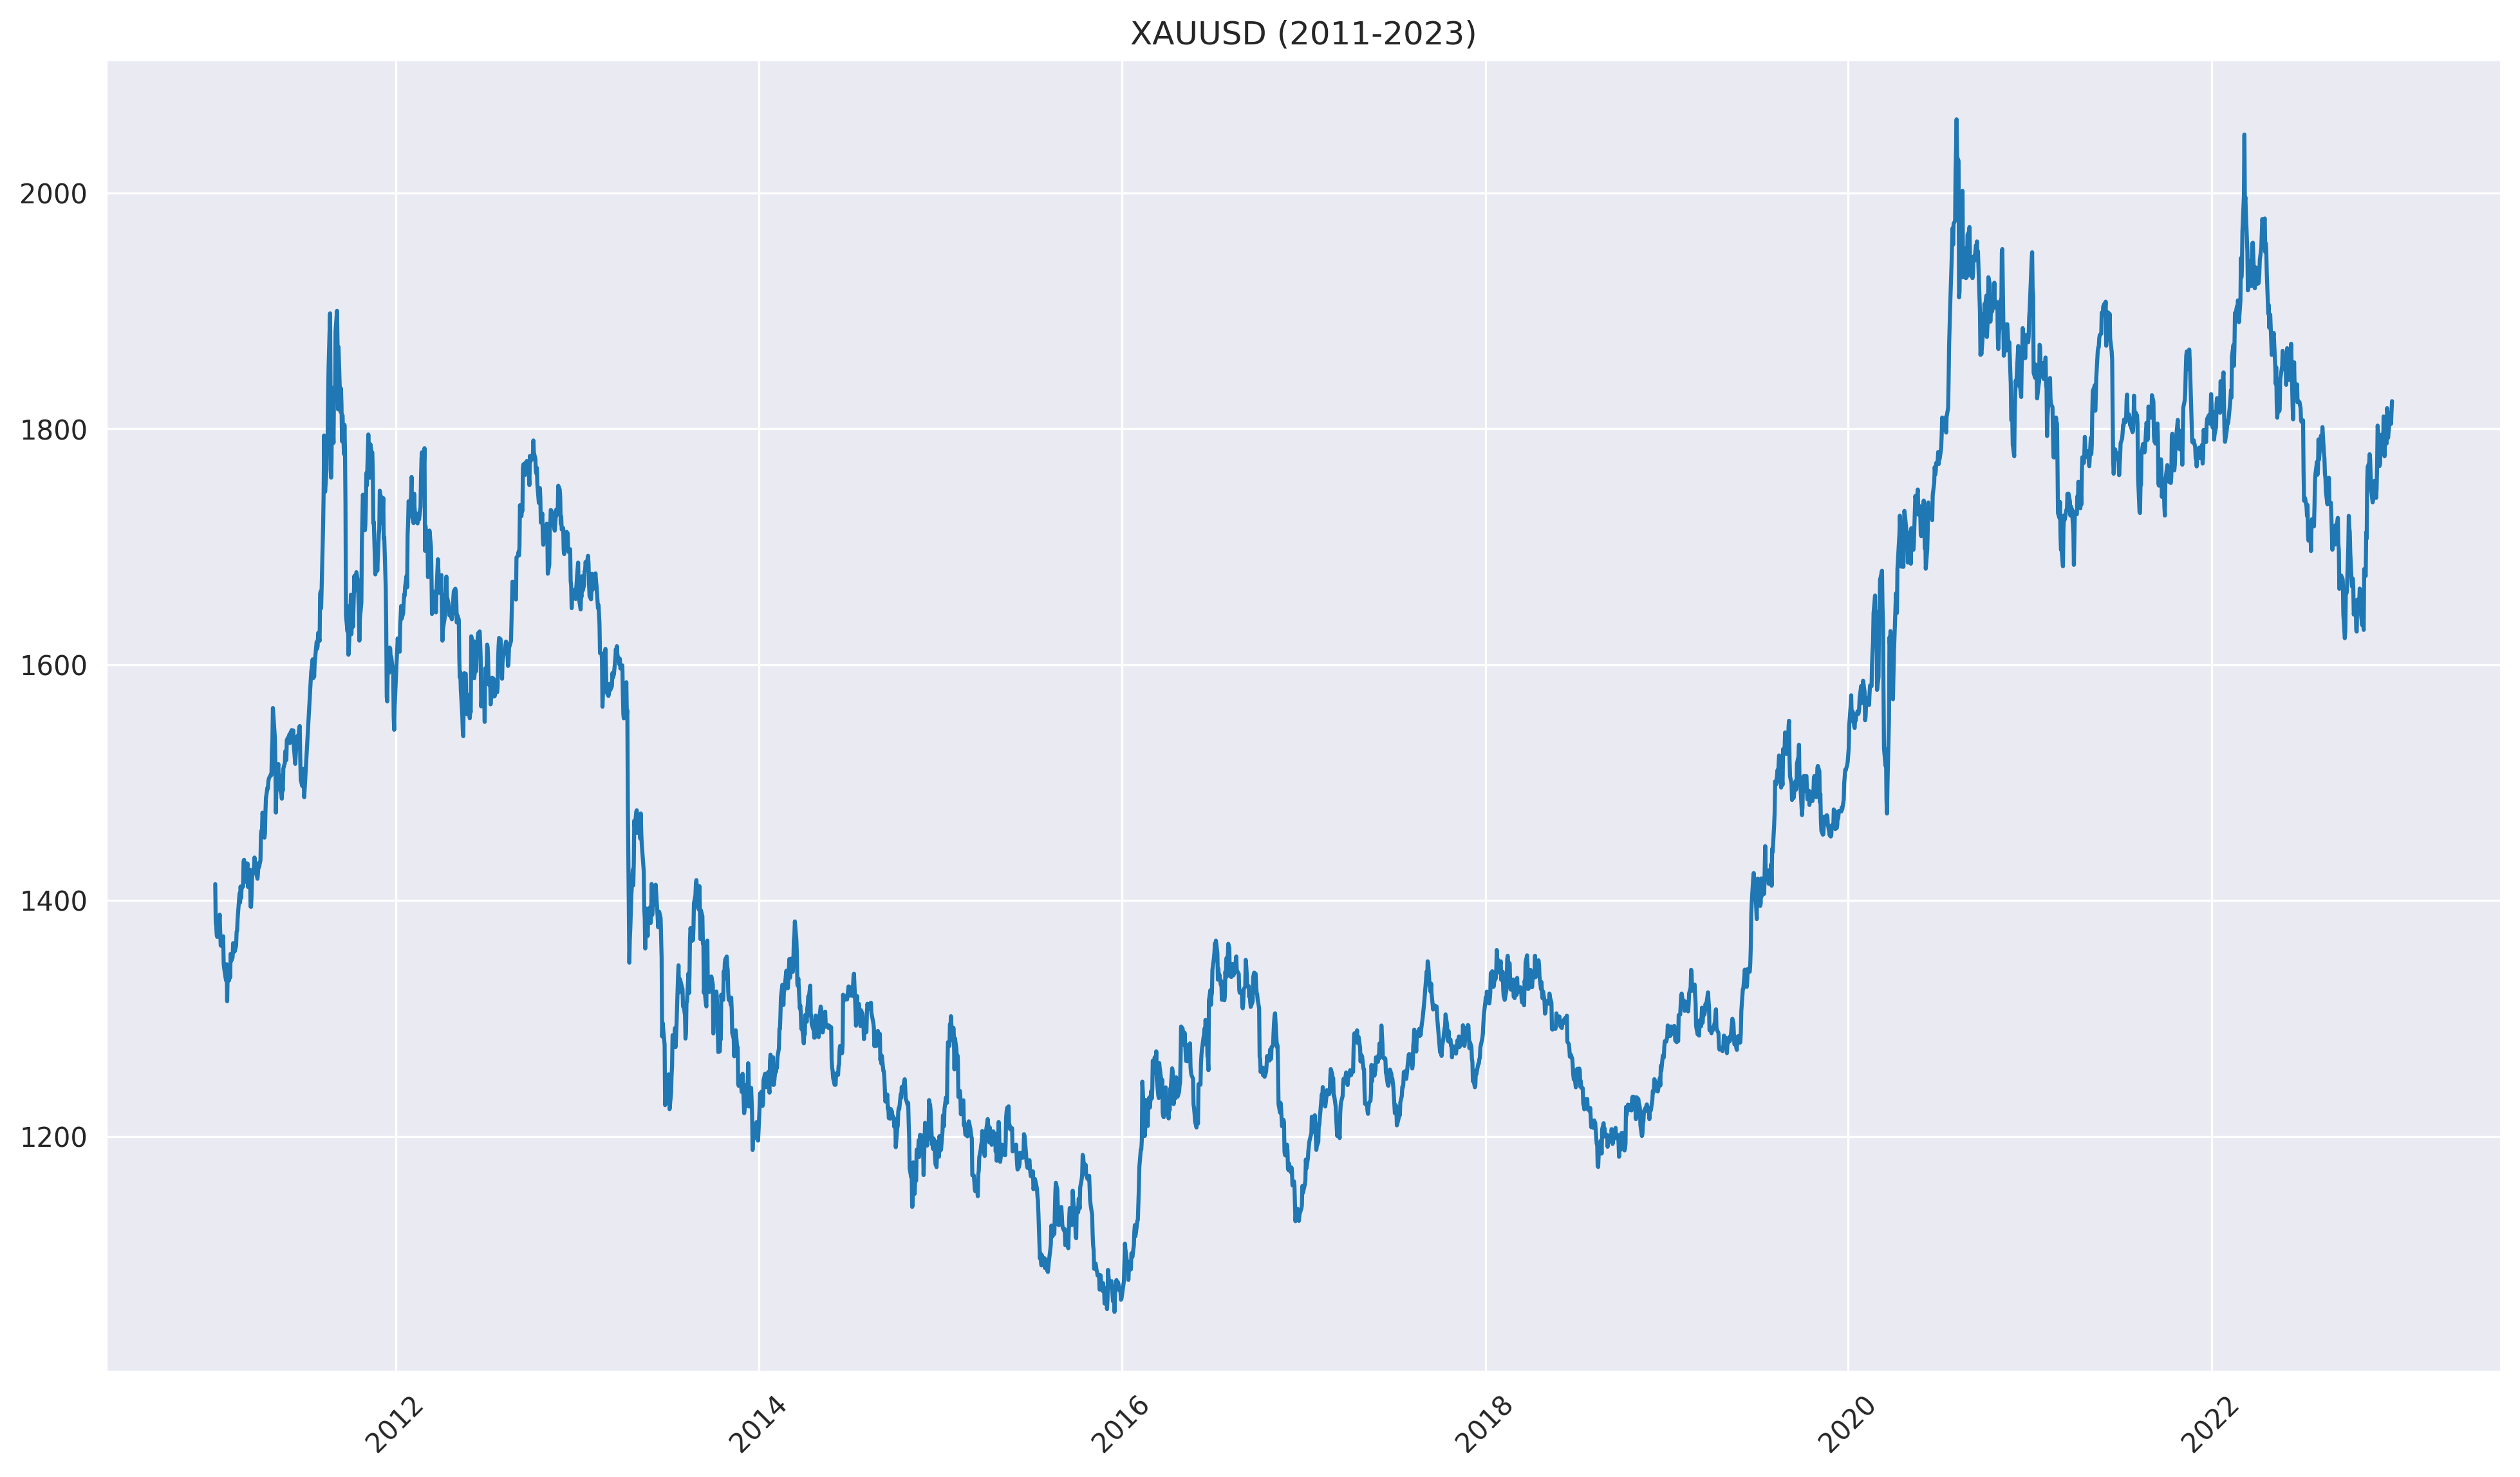

In [6]:
plt.figure(figsize=(16, 9), dpi=300)

df_xauusd = (
    df_xauusd
    [[C_CLOSE]]
)


plt.plot(df_xauusd.index, df_xauusd[C_CLOSE])
plt.xticks(rotation=45)
plt.title('XAUUSD (2011-2023)')
plt.show()

In [7]:
df_xauusd['2016':'2018'] = np.nan

/tmp/ipykernel_114929/4050062458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xauusd['2016':'2018'] = np.nan
/tmp/ipykernel_114929/4050062458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xauusd['2016':'2018'] = np.nan


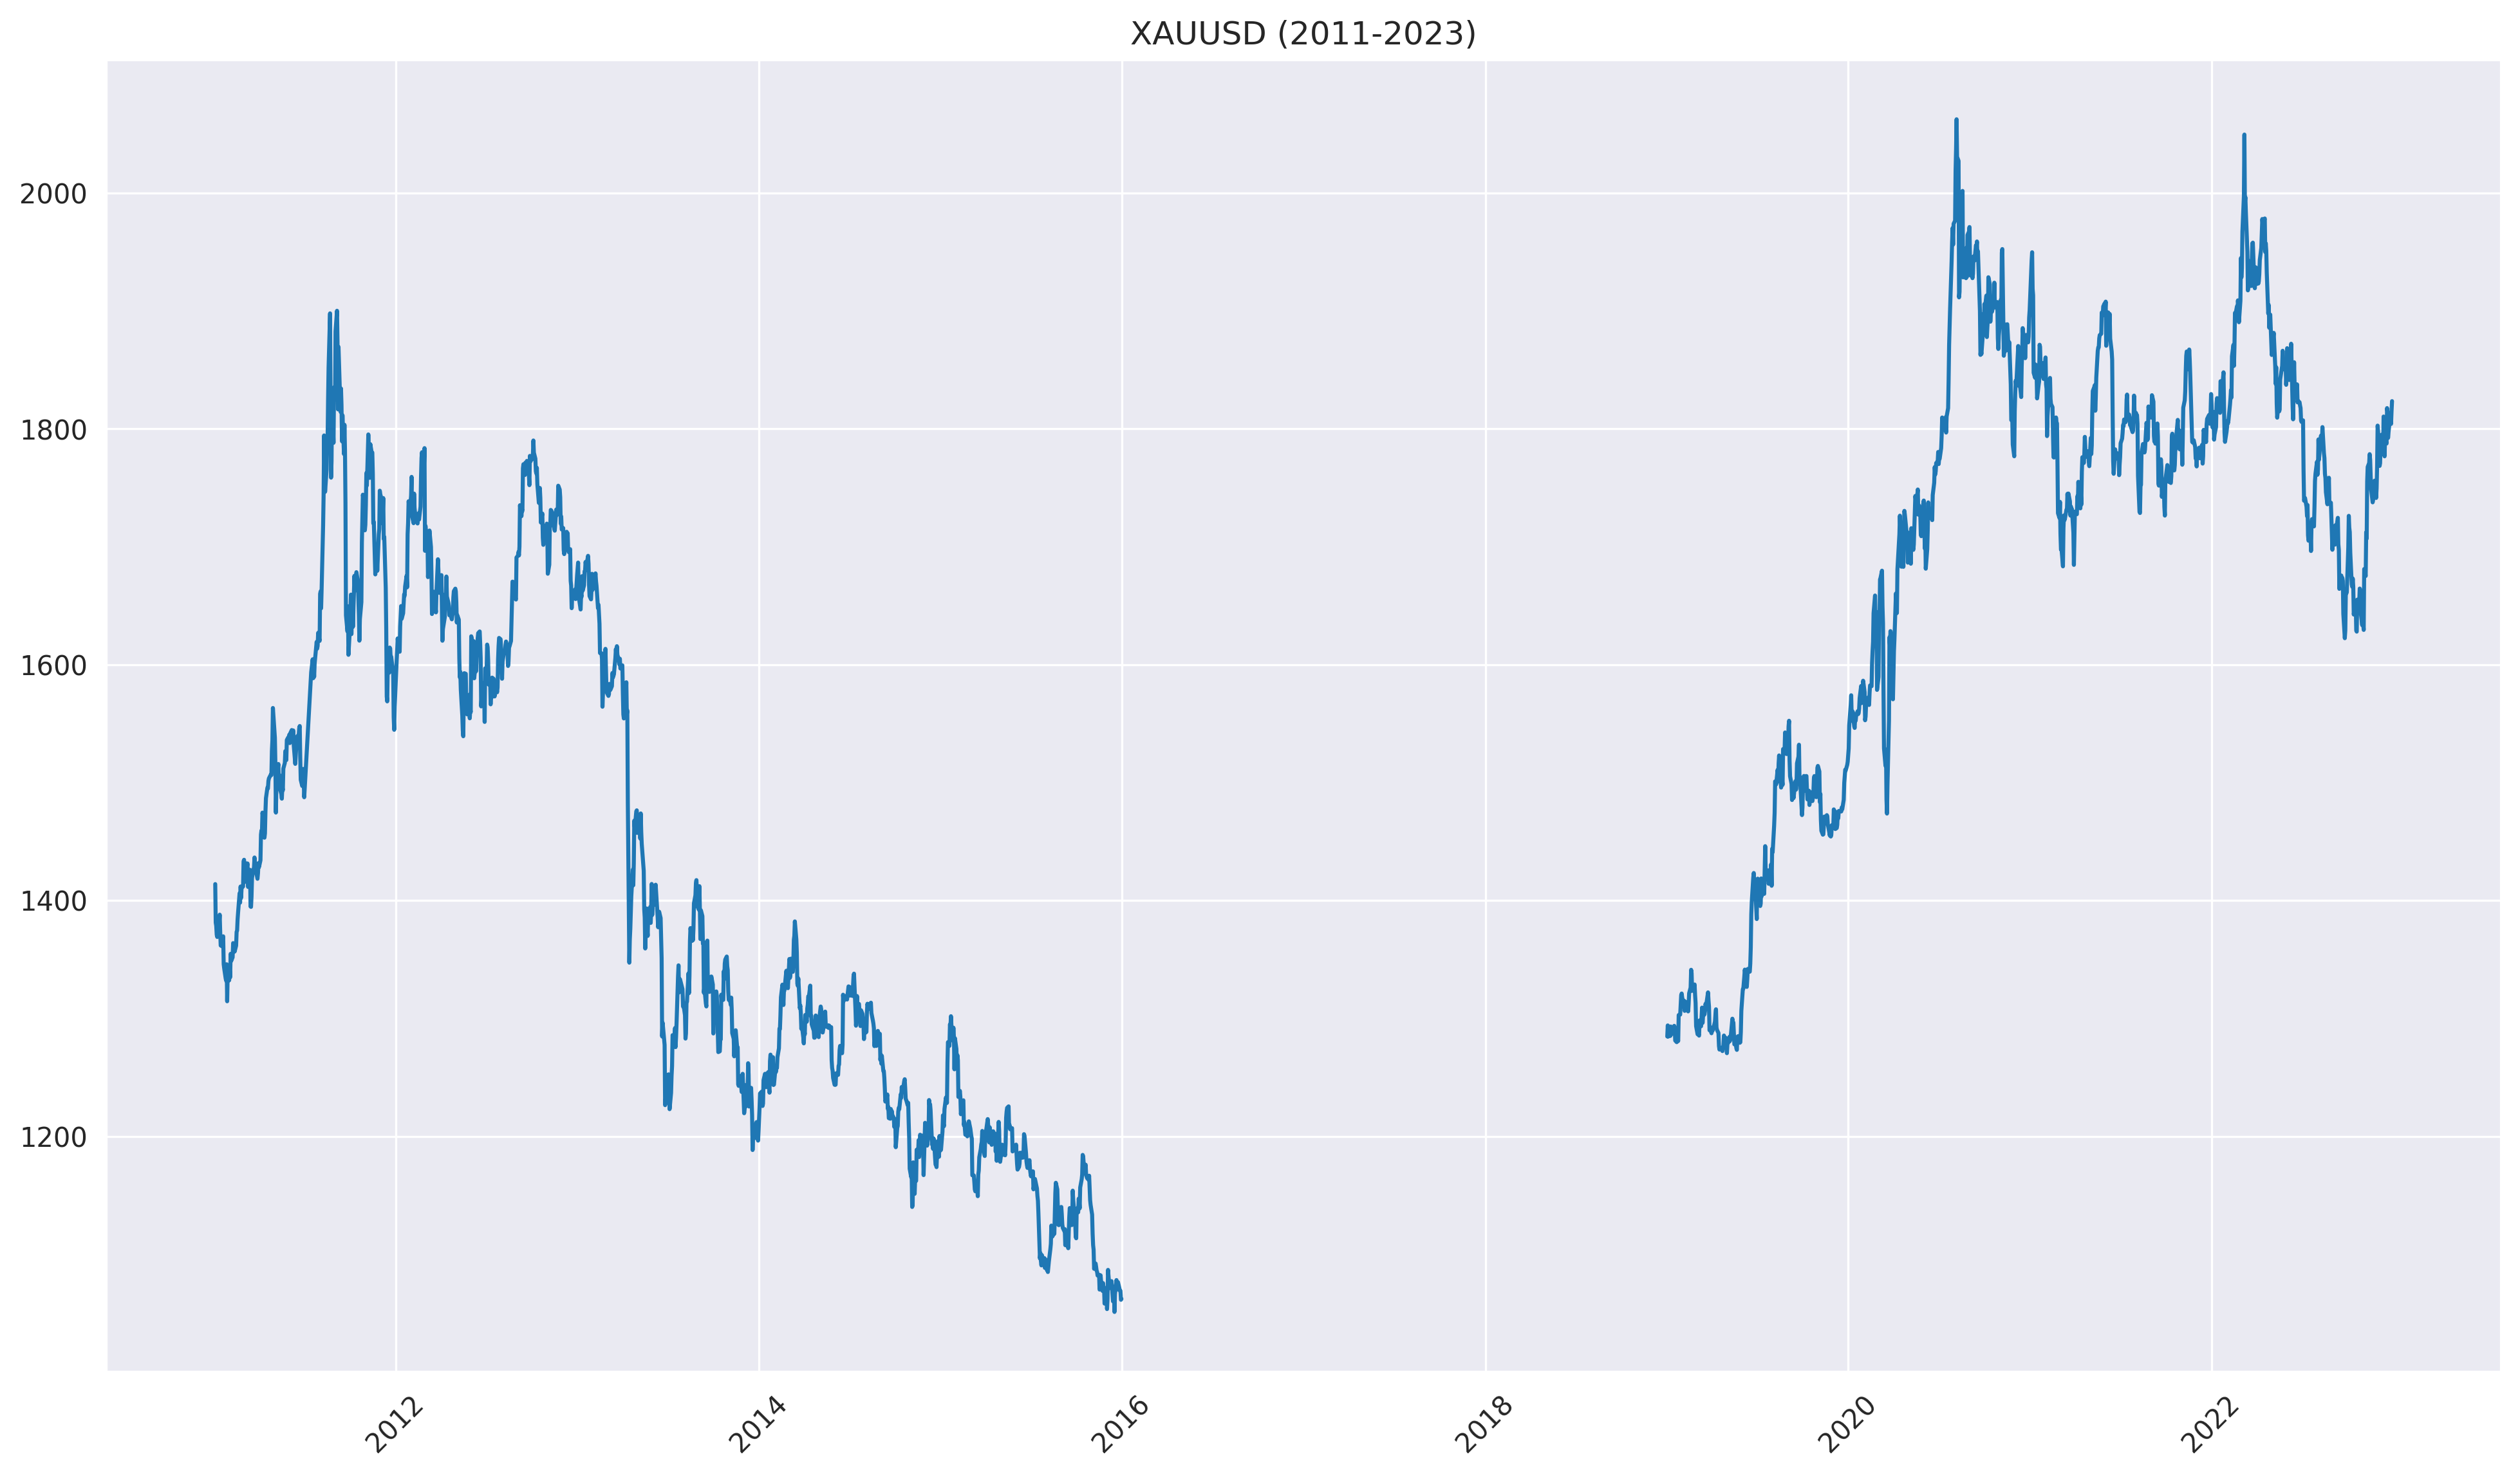

In [8]:
plt.figure(figsize=(16, 9), dpi=300)
plt.plot(df_xauusd.index, df_xauusd[C_CLOSE])
plt.xticks(rotation=45)
plt.title('XAUUSD (2011-2023)')
plt.show()

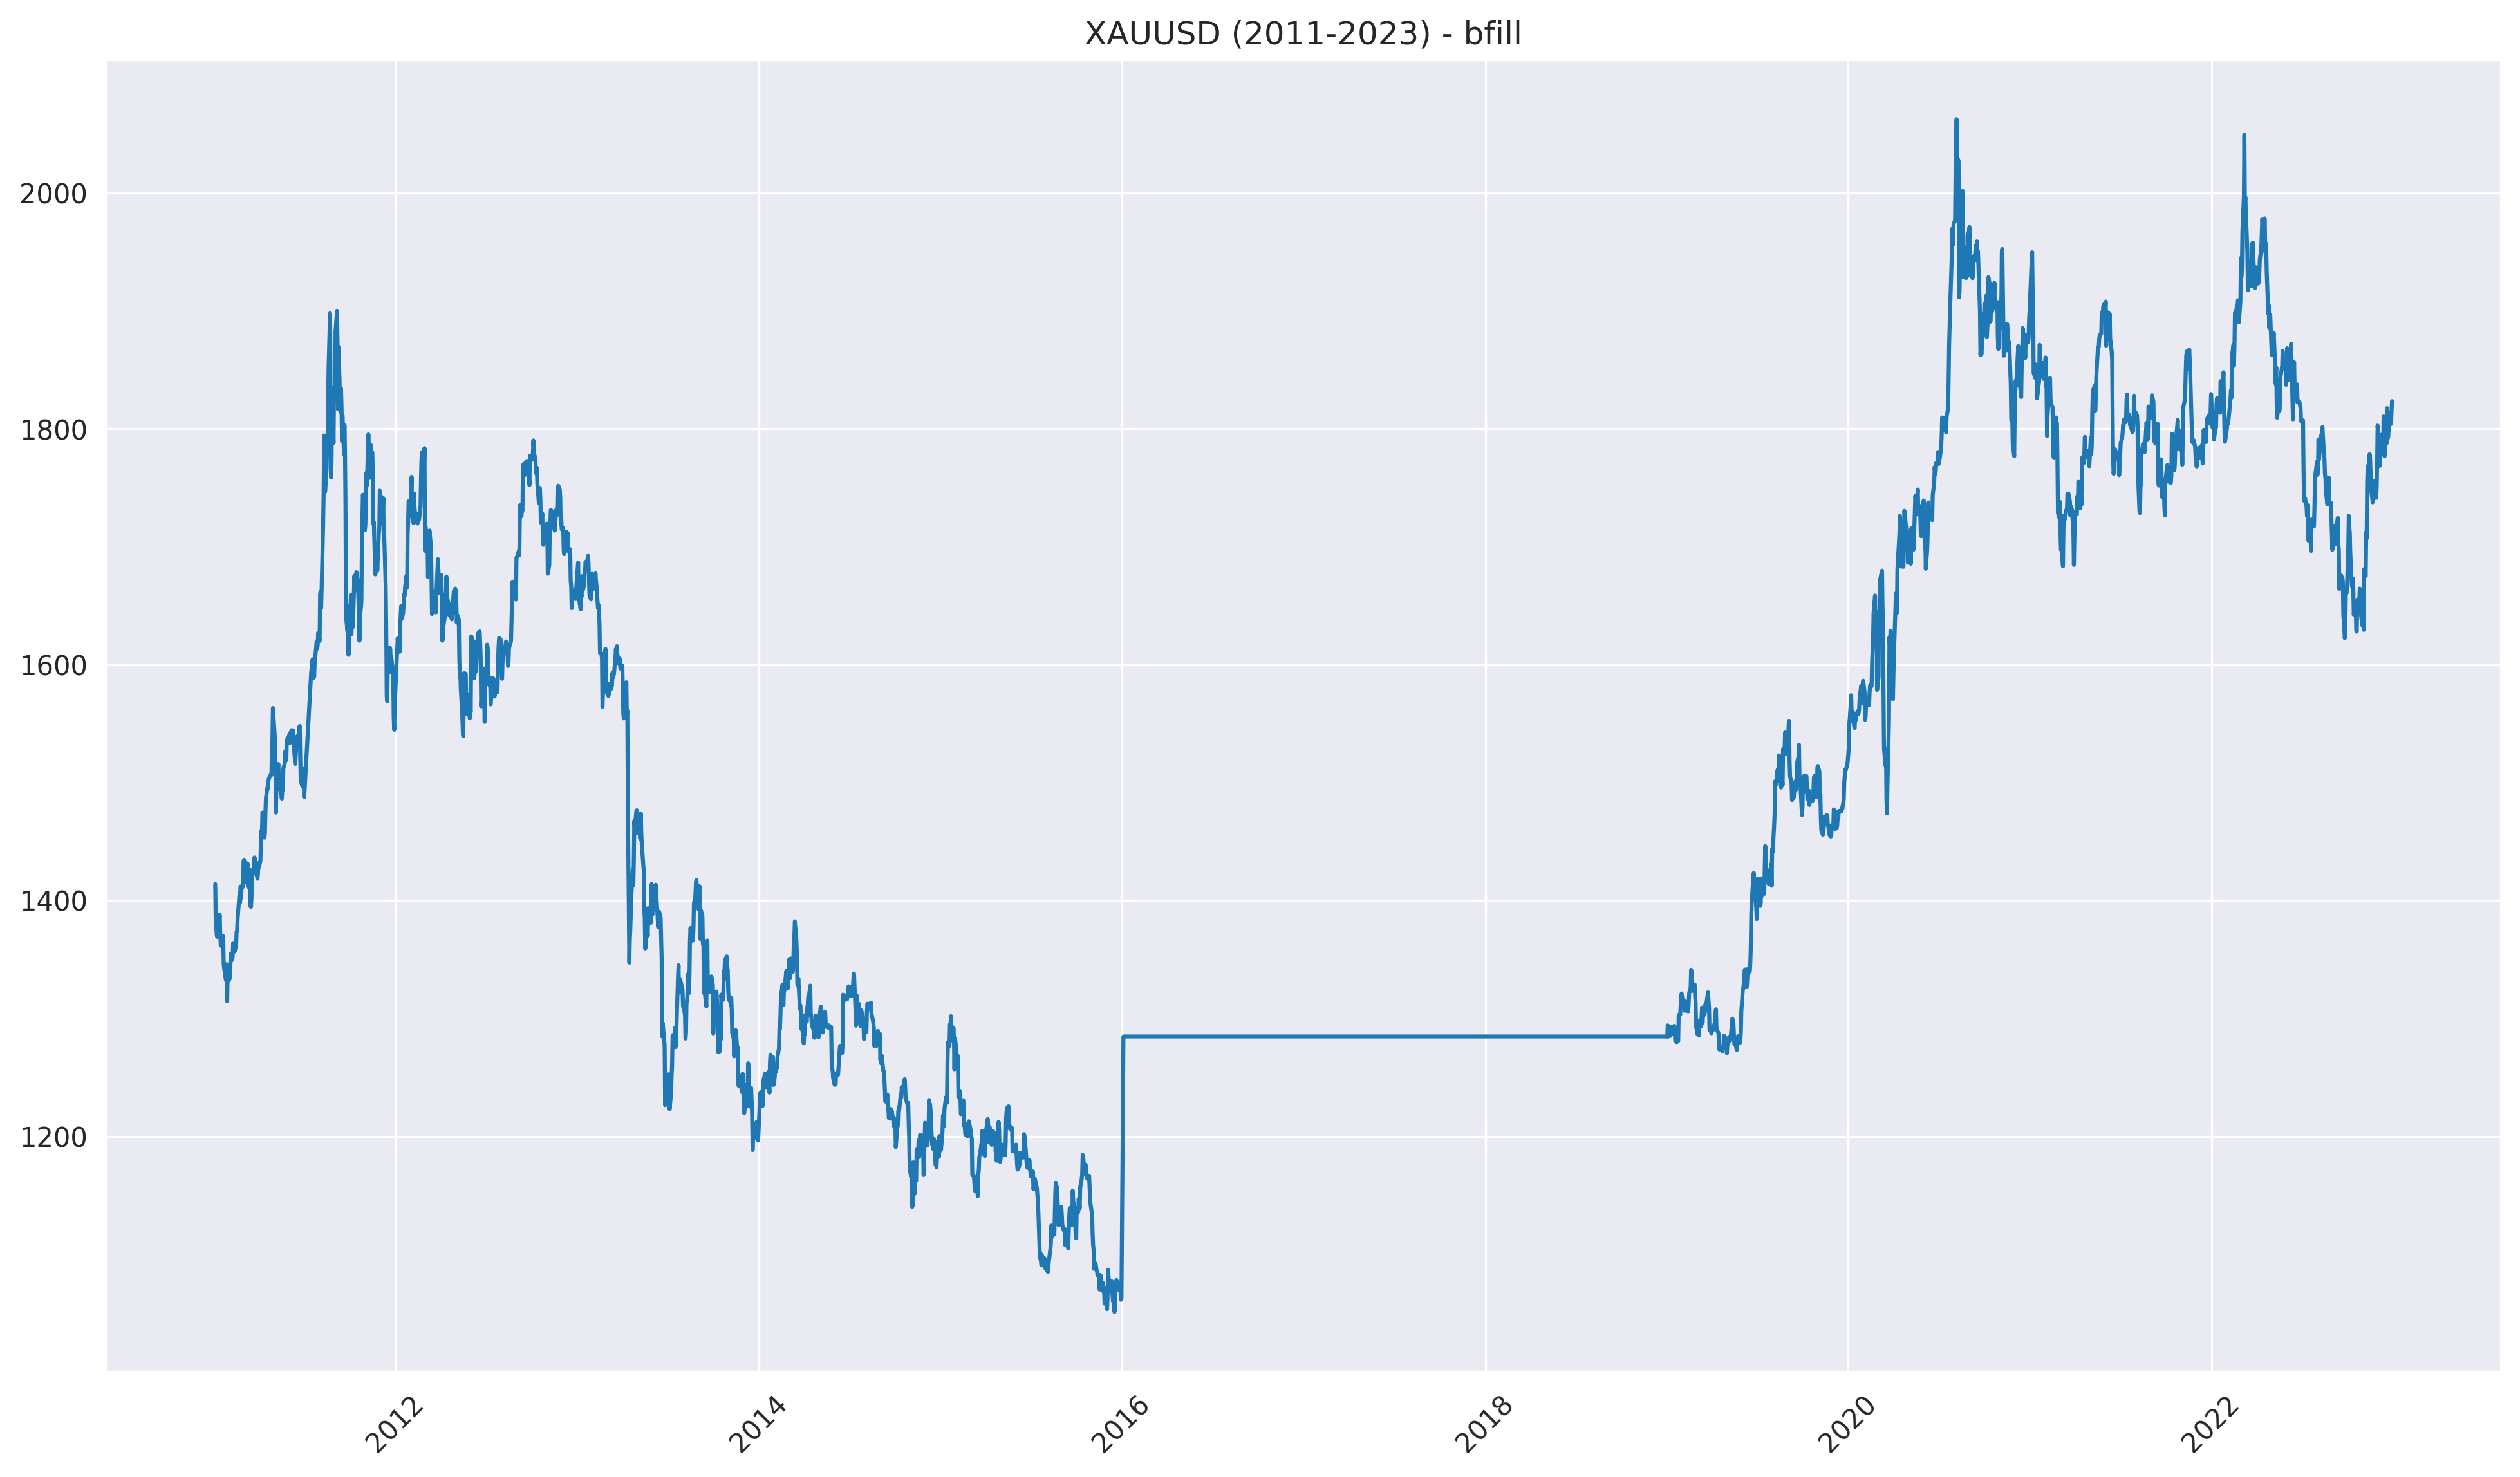

In [9]:
plt.figure(figsize=(16, 9), dpi=300)
plt.plot(df_xauusd.index, df_xauusd[C_CLOSE].fillna(method='bfill'))
plt.xticks(rotation=45)
plt.title('XAUUSD (2011-2023) - bfill')
plt.show()

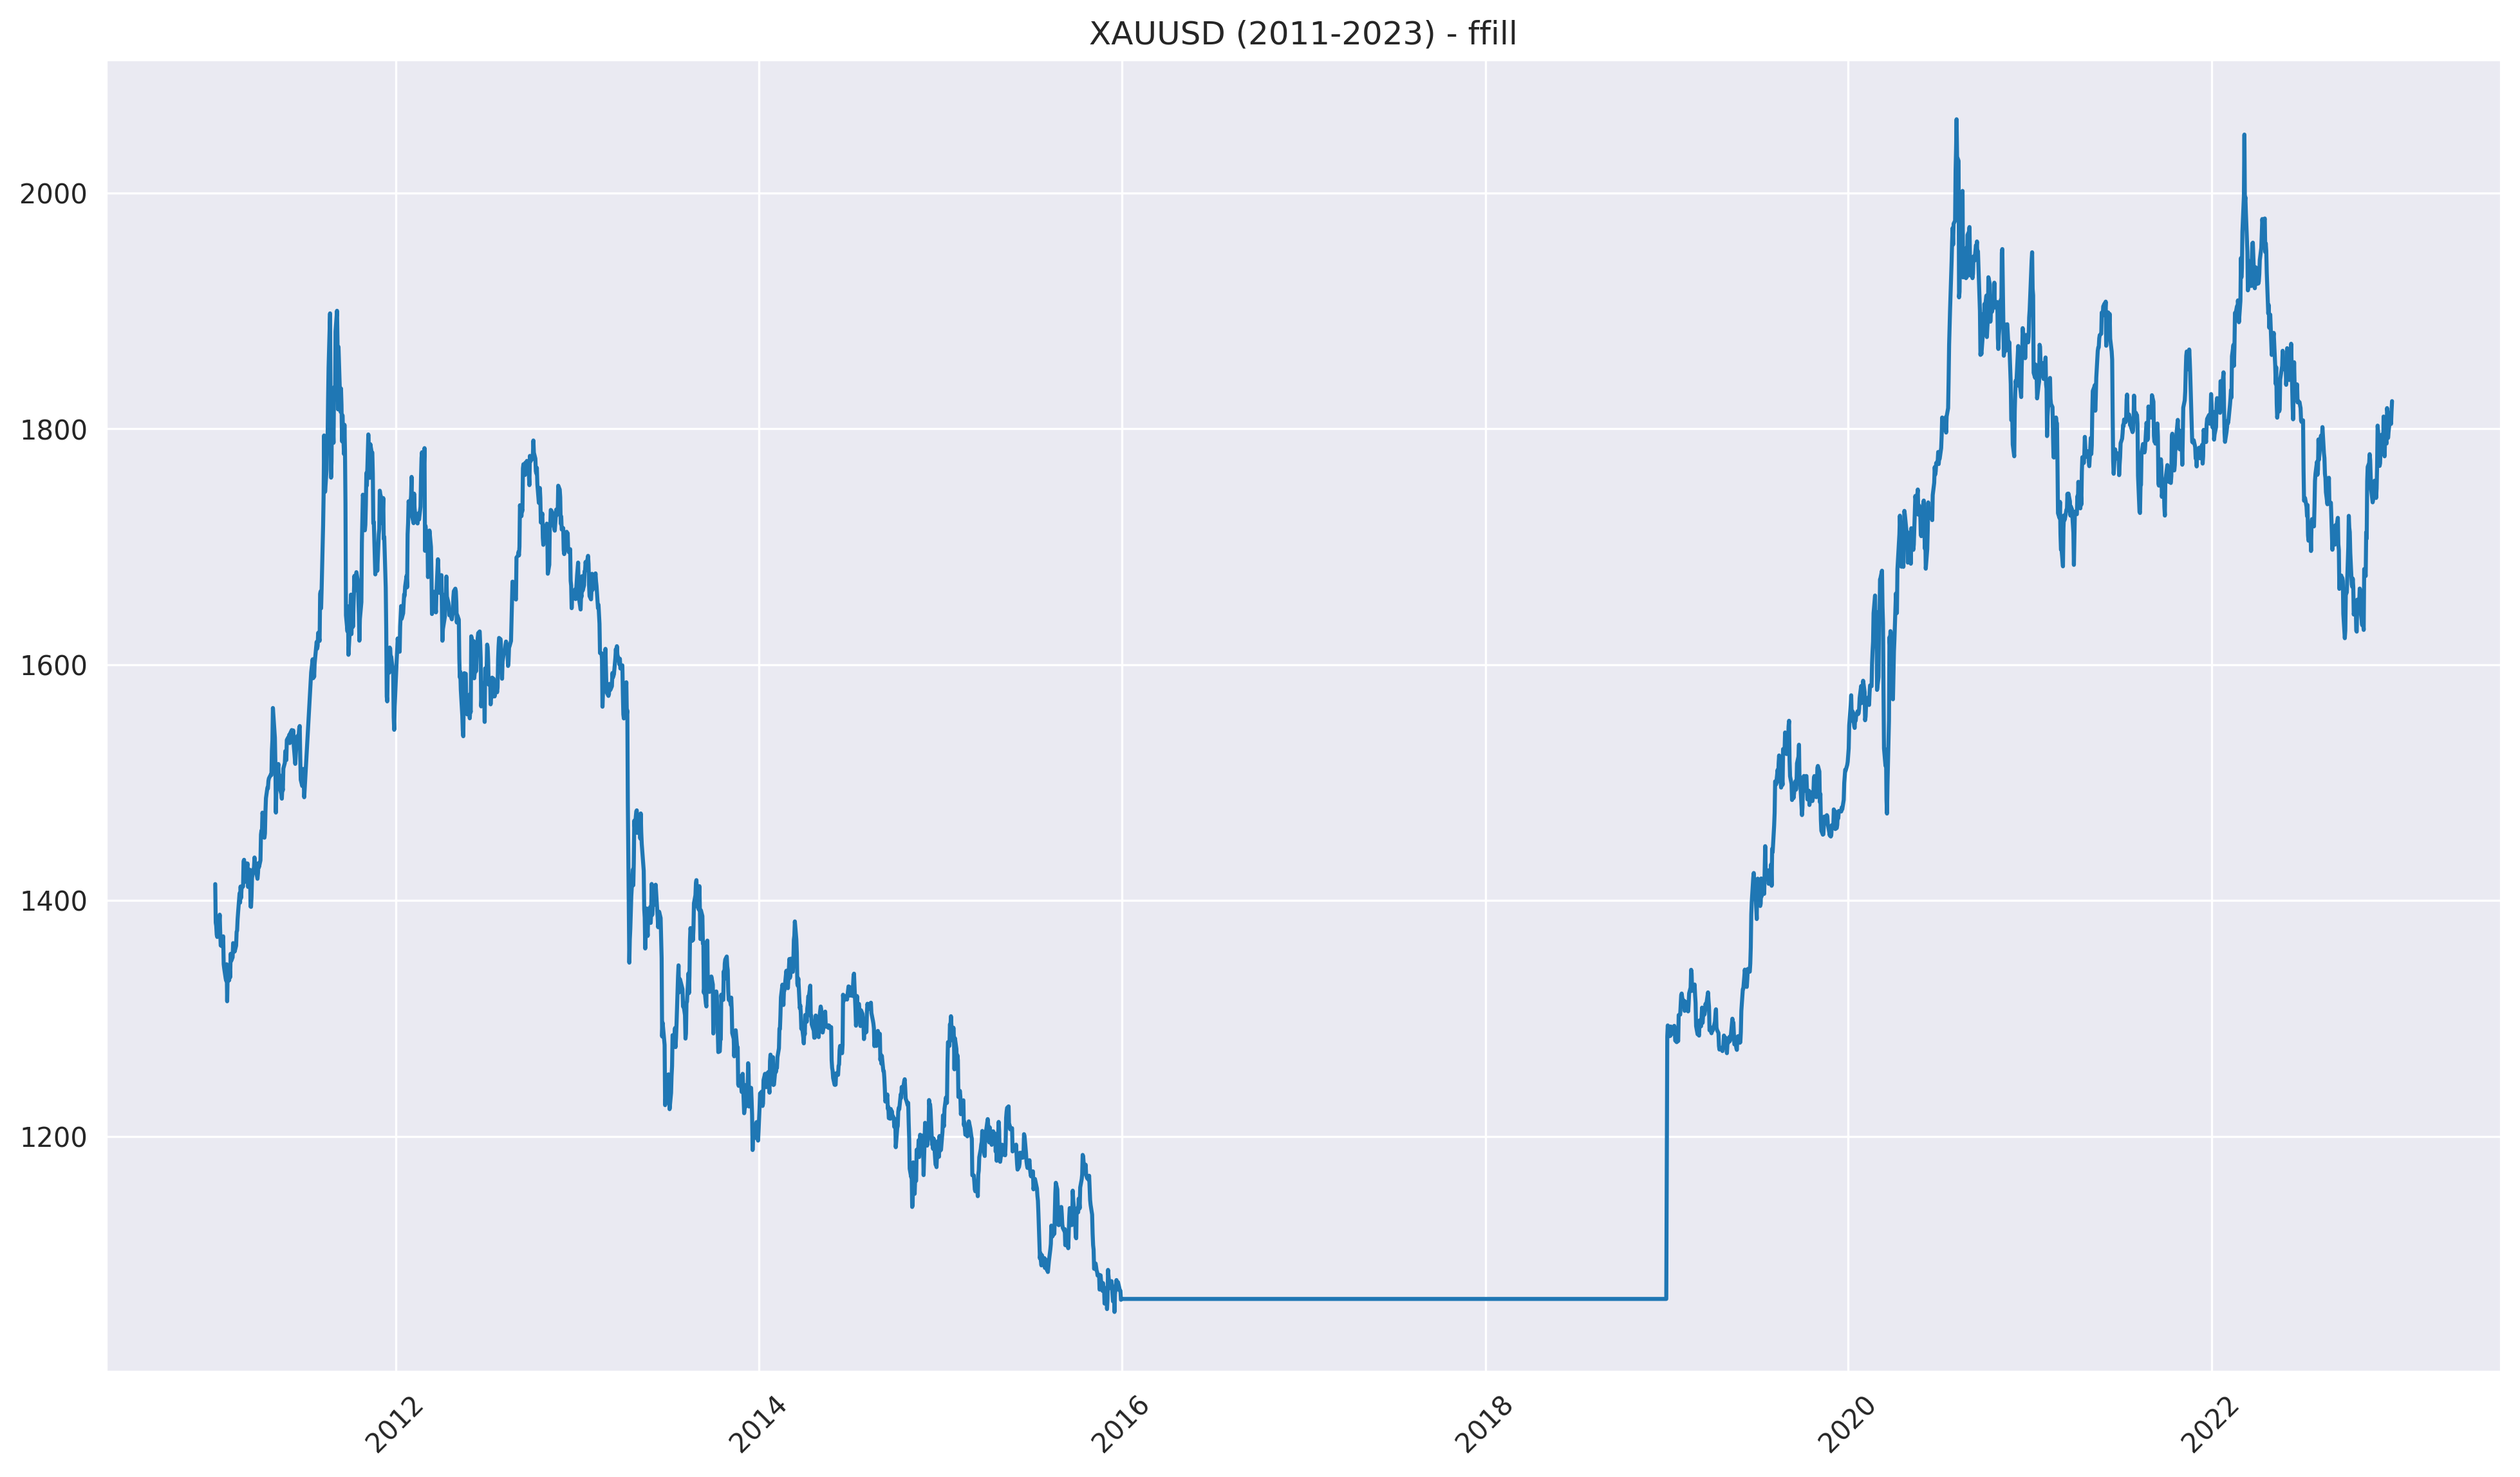

In [10]:
plt.figure(figsize=(16, 9), dpi=300)
plt.plot(df_xauusd.index, df_xauusd[C_CLOSE].fillna(method='ffill'))
plt.xticks(rotation=45)
plt.title('XAUUSD (2011-2023) - ffill')
plt.show()

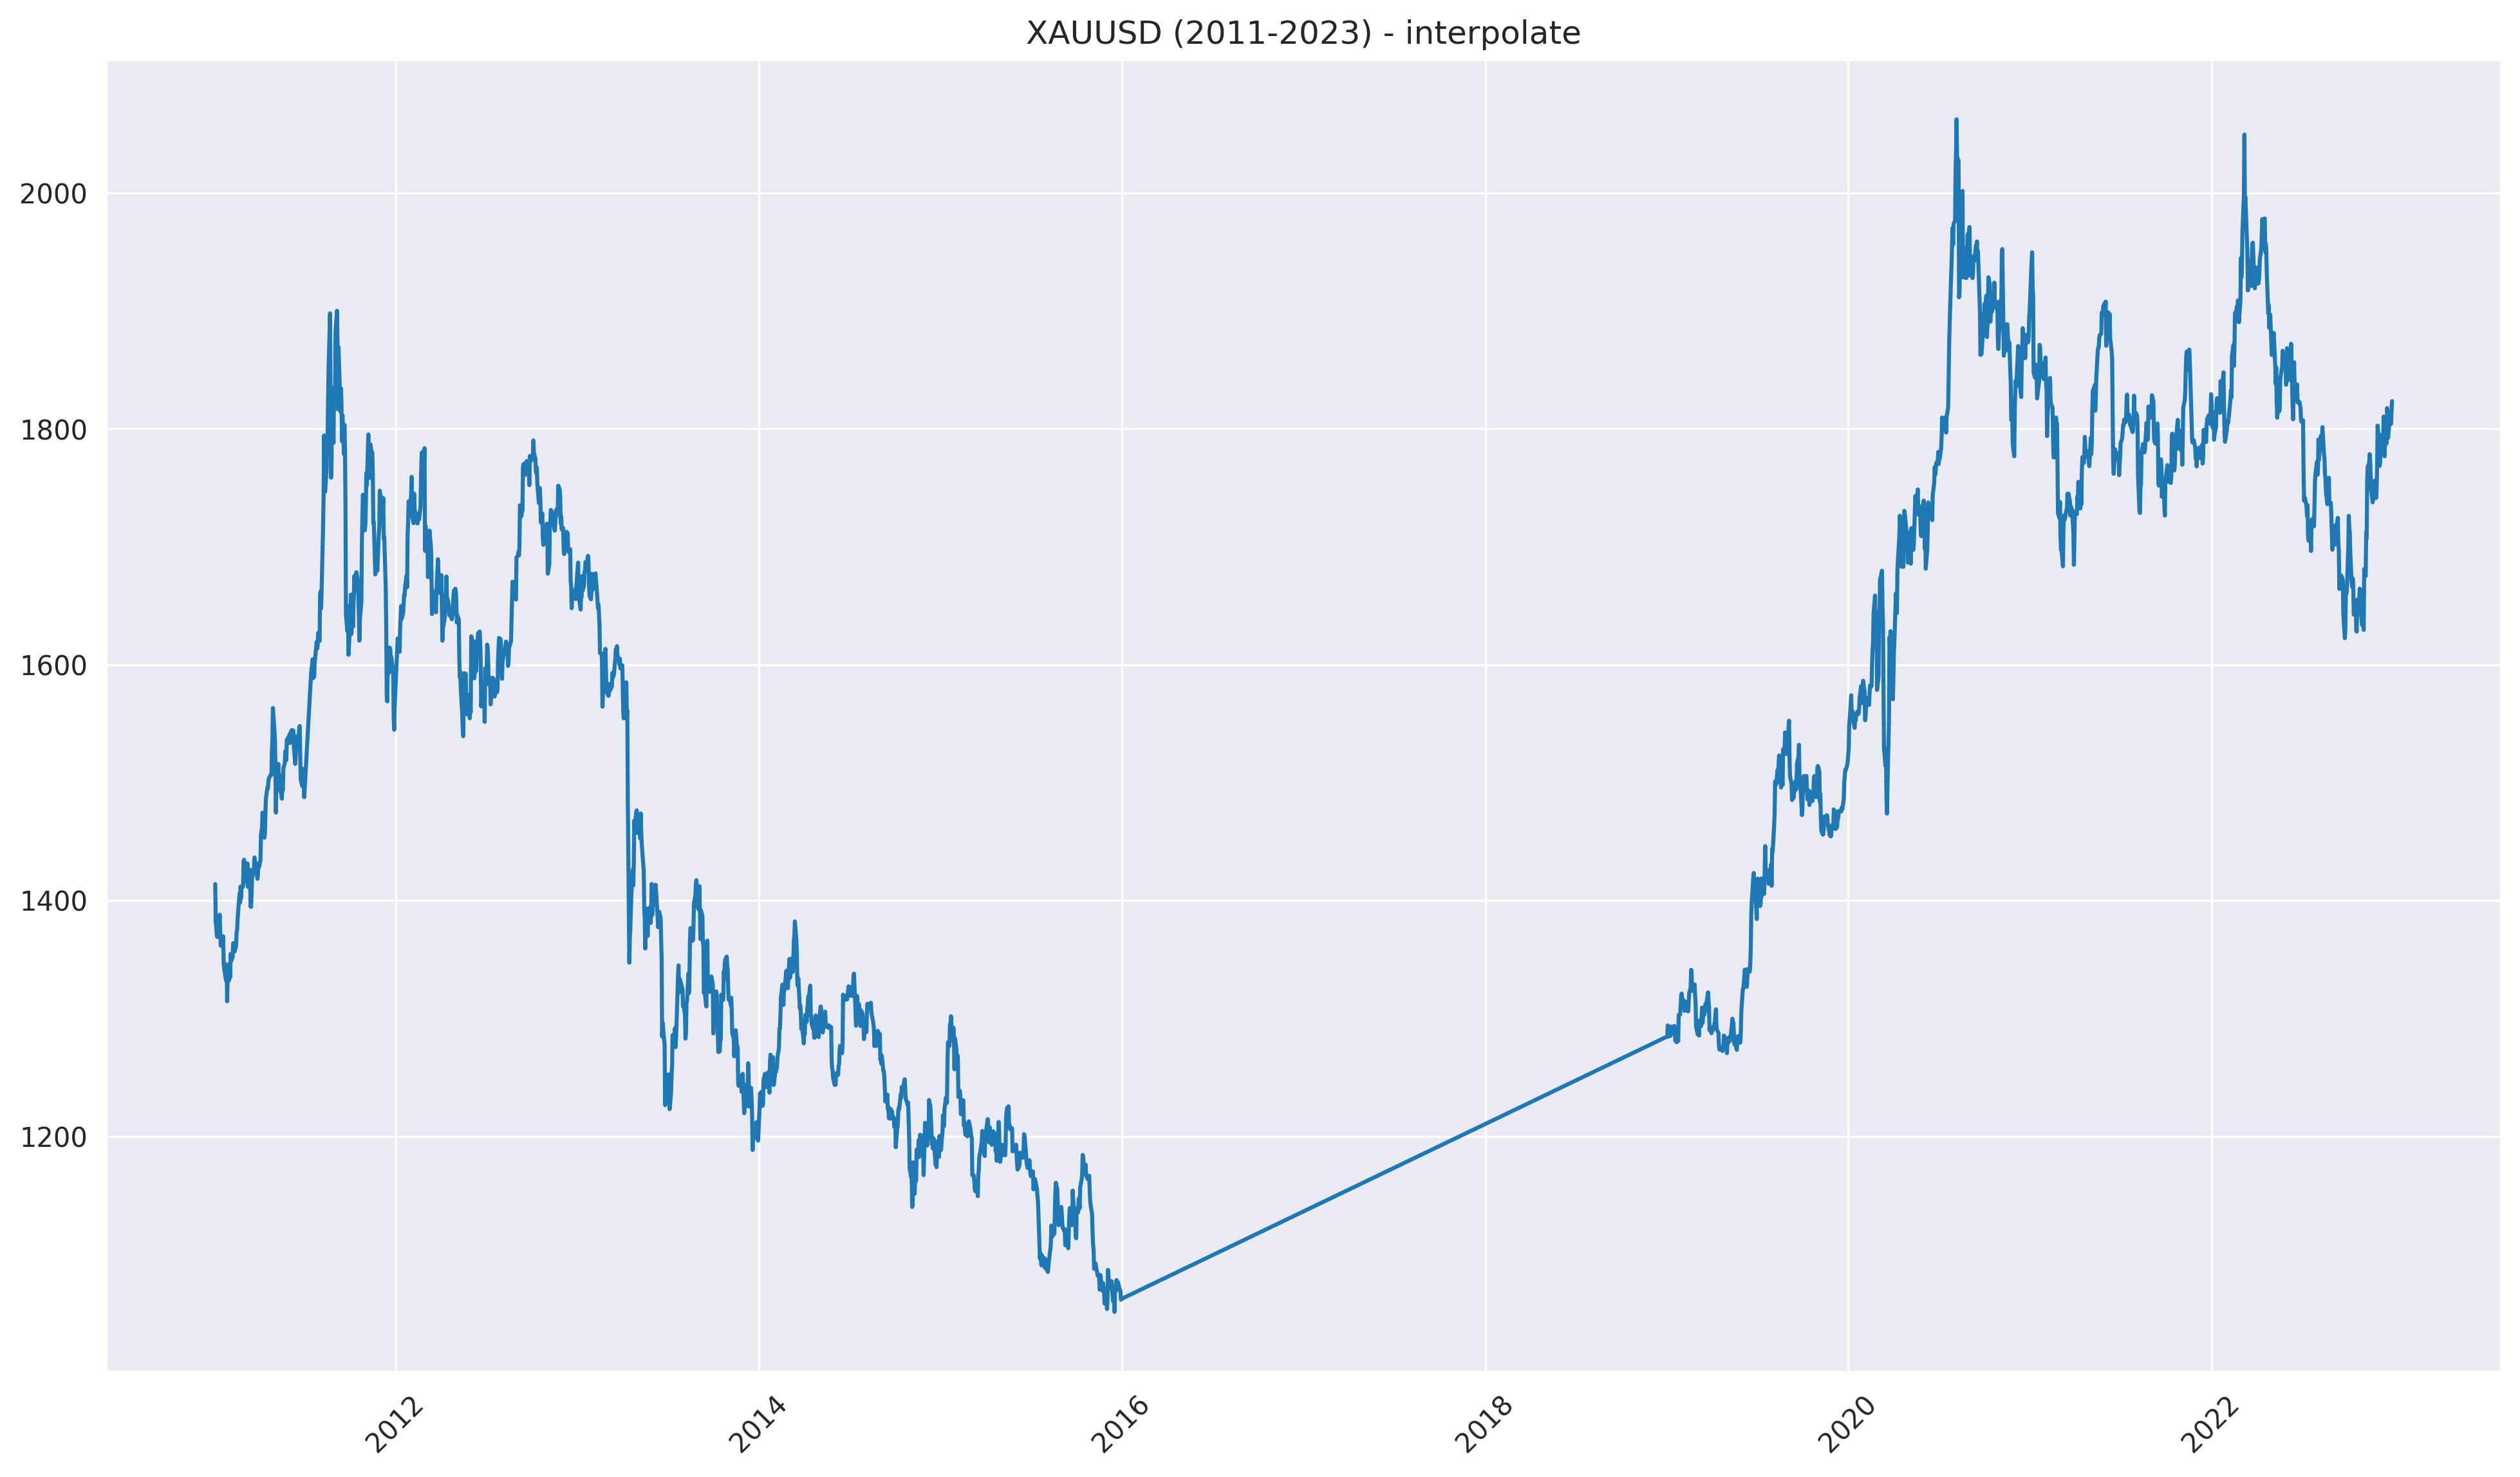

In [11]:
plt.figure(figsize=(16, 9), dpi=300)
sns.lineplot(x=df_xauusd.index, y=df_xauusd[C_CLOSE])
plt.xticks(rotation=45)
plt.title('XAUUSD (2011-2023) - interpolate')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Solution

In [12]:
# df.dropna(axis=0, how='all', inplace=True)
# df.fillna(method='ffill', inplace=True)
# df.fillna(method='bfill', inplace=True)